In [1]:
import numpy as np
import pandas as pd

In [6]:
file_path = r"C:\Users\chasm\Downloads"
file_name = "\Online Retail.xlsx"
df = pd.read_excel(file_path+file_name)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df[df["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
df[df["CustomerID"].isnull()].sort_values(by="Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom


As the sorting result displays -ve values in quantity which indicates that this might be return orders.

Not necessary that return can only be applicable where Customer ID is null so no we have two aspect to check -ve values where Customer ID is null as well as where it is not null.

# Let's find out the return orders where the custome ID is null 

In [10]:
null_customers_df = df[df["CustomerID"].isnull()]

null_id_orders = null_customers_df[null_customers_df["Quantity"]<0].InvoiceNo.nunique()

print("Total Return Orders where the Customer ID is null = ",null_id_orders)

Total Return Orders where the Customer ID is null =  1518


# Let's find out the total return orders 

In [11]:
total_return = df[df["Quantity"]<0].InvoiceNo.nunique()

print("Total Number of Return orders = ",total_return)

Total Number of Return orders =  5172


# Let's see the order count Country wise  

In [12]:
import matplotlib.pyplot as plt

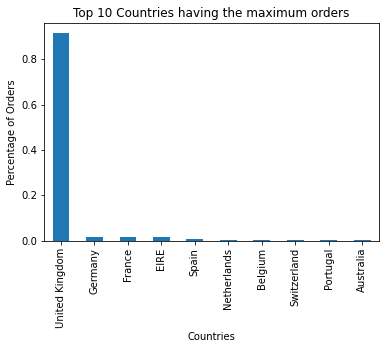

In [13]:
df["Country"].value_counts(normalize=True).head(10).plot(kind="bar")
plt.xlabel("Countries")
plt.ylabel("Percentage of Orders")
plt.title("Top 10 Countries having the maximum orders")
plt.show()

From this we can conclude that more than 90% orders are from UK

In [14]:
# Restricting the data only for UK
df = df[df["Country"]=="United Kingdom"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [15]:
# Restricting the data where Quantity > 0
df = df[df["Quantity"]>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [16]:
# Convert the date into DateTime object. Print the max and min date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

<ipython-input-16-d946cd631413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [17]:
df["Month"] = df["InvoiceDate"].dt.month
df

<ipython-input-17-821dab55a1f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["InvoiceDate"].dt.month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12


In [18]:
df["Year"] = df["InvoiceDate"].dt.year
df

<ipython-input-18-232f81d7b22c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["InvoiceDate"].dt.year


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011


In [19]:
# Converting from integer to string
df["Month"] = df["Month"].astype("str")
df["Year"] = df["Year"].astype("str")

df["Month-Year_wise"] = df["Month"]+"-"+df["Year"]
df

<ipython-input-19-02931a68b245>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Month"].astype("str")
<ipython-input-19-02931a68b245>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype("str")
<ipython-input-19-02931a68b245>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month-Year_wise
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,12-2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,12-2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,12-2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,12-2011


Drop record where Customer ID is null

Drop record where Unit Price is less than 0

Create a Revenue field (Revenue = Quantity * UnitPrice

In [20]:
df = df[df["CustomerID"].notnull()]

In [21]:
df["Revenue"] = df["Quantity"]*df["UnitPrice"]

<ipython-input-21-74b1fdd8c8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue"] = df["Quantity"]*df["UnitPrice"]


# Aggregating the orders by Month 

In [22]:
print("The Minimum date is : ",df["InvoiceDate"].min().date())
print("The Maximum date is : ",df["InvoiceDate"].max().date())

The Minimum date is :  2010-12-01
The Maximum date is :  2011-12-09


So we have around one year of Data

In [23]:
df["Month"] = df["Month"].astype("int")
df["Year"] = df["Year"].astype("int")

<ipython-input-23-10b12c6a8e36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Month"].astype("int")
<ipython-input-23-10b12c6a8e36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype("int")


In [29]:
df.groupby("Month-Year_wise",
           as_index=False).agg({"InvoiceNo": "nunique",
                                "Revenue": "sum",
                                "Year": "first",
                                "Month": "first"})

,Month-Year_wise,InvoiceNo,Revenue,Year,Month
0,1-2011,874,442190.060,2011,1
1,10-2011,1705,824766.220,2011,10
2,11-2011,2387,980645.750,2011,11
3,12-2010,1291,498661.850,2010,12
4,12-2011,706,472384.170,2011,12
5,2-2011,897,355655.630,2011,2
6,3-2011,1177,467198.590,2011,3
7,4-2011,1058,409559.141,2011,4
8,5-2011,1403,551568.820,2011,5
9,6-2011,1249,524915.480,2011,6


In [35]:
df_month_agg = df.groupby("Month-Year_wise",
           as_index=False).agg({"InvoiceNo": "nunique",
                                "Revenue": "sum",
                                "Year": "first",
                                "Month": "first"}).rename(columns={"InvoiceNo":"No. of Orders"})
df_month_agg = df_month_agg.sort_values(by=["Year","Month"])
df_month_agg

,Month-Year_wise,No. of Orders,Revenue,Year,Month
3,12-2010,1291,498661.850,2010,12
0,1-2011,874,442190.060,2011,1
5,2-2011,897,355655.630,2011,2
6,3-2011,1177,467198.590,2011,3
7,4-2011,1058,409559.141,2011,4
8,5-2011,1403,551568.820,2011,5
9,6-2011,1249,524915.480,2011,6
10,7-2011,1200,485612.251,2011,7
11,8-2011,1133,498453.320,2011,8
12,9-2011,1569,796780.272,2011,9


# Create Month wise Quantity plot (line plot) 

In [36]:
df_month_agg[["Month-Year_wise","No. of Orders"]]

,Month-Year_wise,No. of Orders
3,12-2010,1291
0,1-2011,874
5,2-2011,897
6,3-2011,1177
7,4-2011,1058
8,5-2011,1403
9,6-2011,1249
10,7-2011,1200
11,8-2011,1133
12,9-2011,1569


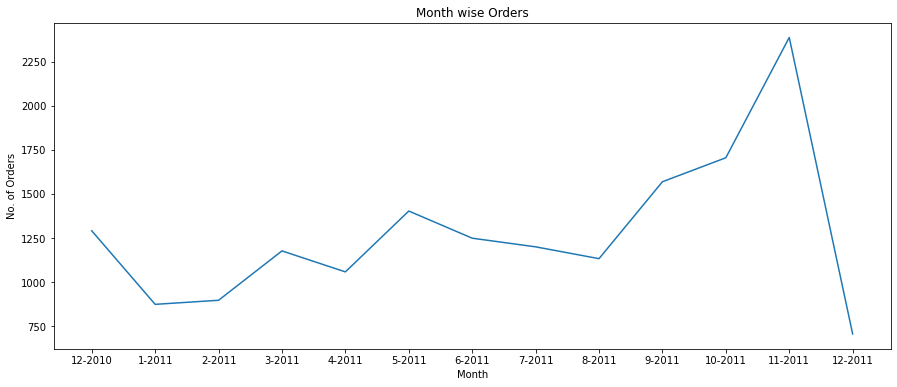

In [37]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg["Month-Year_wise"],df_month_agg["No. of Orders"])
plt.xlabel("Month")
plt.ylabel("No. of Orders")
plt.title("Month wise Orders")
plt.savefig("Month wise Order Summary.png")
plt.show()

# Create Month wise Revenue plot (line plot) 

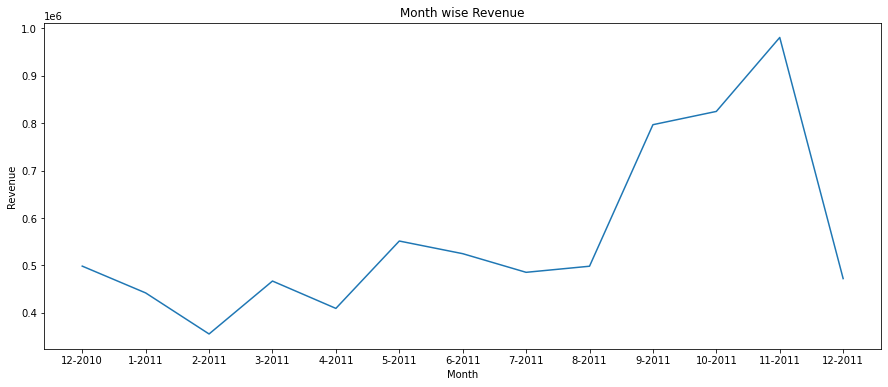

In [38]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg["Month-Year_wise"],df_month_agg["Revenue"])
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Month wise Revenue")
plt.savefig("Month wise Revenue Summary.png")
plt.show()

# Recency

In [39]:
last_date = pd.datetime(2011,12,9)
last_date

<ipython-input-39-550cfd65c0e0>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  last_date = pd.datetime(2011,12,9)


datetime.datetime(2011, 12, 9, 0, 0)

In [40]:
df_recency = df.groupby("CustomerID",as_index=False).agg({"InvoiceDate":"max"})

# How recently the customer made a purchase
df_recency["Recency"] = (last_date-df_recency["InvoiceDate"]).dt.days
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,-1
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


In [41]:
df_recency["Recency"].replace([-1],[0],inplace=True)
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


In [47]:
df_FM = df.groupby("CustomerID",as_index=False).agg({"InvoiceNo":"nunique",
                                                     "Revenue":"sum"})
df_FM

,CustomerID,InvoiceNo,Revenue
0,12346.0,1,77183.60
1,12747.0,11,4196.01
2,12748.0,210,33719.73
3,12749.0,5,4090.88
4,12820.0,4,942.34
...,...,...,...
3916,18280.0,1,180.60
3917,18281.0,1,80.82
3918,18282.0,2,178.05
3919,18283.0,16,2094.88


In [43]:
df_RFM = pd.merge(df_recency,df_FM,on="CustomerID",how="inner")
df_RFM

,CustomerID,InvoiceDate,Recency,InvoiceNo,Revenue
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


In [51]:
df_RFM.rename(columns={"InvoiceNo":"Frequency","Revenue":"Monetary"},inplace=True)
df_RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


In [52]:
df_RFM.drop(columns="InvoiceDate",inplace=True)
df_RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,2,5,4090.88
4,12820.0,2,4,942.34
...,...,...,...,...
3916,18280.0,276,1,180.60
3917,18281.0,179,1,80.82
3918,18282.0,6,2,178.05
3919,18283.0,2,16,2094.88


# Modelling Data : RFM Quantile 

Now we split the metric in segments using Quantiles. We will assign scores from 1-4 to each recenc, Frequency and Monetary respectively.

1 is the highest value and 4 is the lowest value.

Our Final RFM score is calculated simply by combining individual RFM scores.

In [53]:
Quantiles = df_RFM.quantile(q=[0.25,0.5,0.75,])
Quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,16.0,1.0,300.04
0.50,15569.0,49.0,2.0,651.82
0.75,16913.0,141.0,5.0,1575.89


In [54]:
Quantiles = Quantiles.to_dict()
Quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003}}

In [55]:
Quantiles["Recency"][0.25]

16.0

In [56]:
segmented_RFM =df_RFM.copy()

In [60]:
def RScore(data,column,Quantiles):
    if data <= Quantiles[column][0.25]:
        return 1
    elif data <= Quantiles[column][0.50]:
        return 2
    elif data <= Quantiles[column][0.75]:
        return 3
    else:
        return 4

def FMScore(data,column,Quantiles):
    if data <= Quantiles[column][0.25]:
        return 4
    elif data <= Quantiles[column][0.50]:
        return 3
    elif data <= Quantiles[column][0.75]:
        return 2
    else:
        return 1

In [61]:
# apply - everytime we have a sequence like list, array, series, pd columnsand we want to apply 
#a function in each elementof the sequence 
segmented_RFM["Recency_Quartile"] = segmented_RFM["Recency"].apply(RScore,args=("Recency",Quantiles))
segmented_RFM["Frequency_Quartile"] = segmented_RFM["Frequency"].apply(FMScore,args=("Frequency",Quantiles))
segmented_RFM["Monetary_Quartile"] = segmented_RFM["Monetary"].apply(FMScore,args=("Monetary",Quantiles))
segmented_RFM

,CustomerID,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile
0,12346.0,324,1,77183.60,4,4,1
1,12747.0,1,11,4196.01,1,1,1
2,12748.0,0,210,33719.73,1,1,1
3,12749.0,2,5,4090.88,1,2,1
4,12820.0,2,4,942.34,1,2,2
...,...,...,...,...,...,...,...
3916,18280.0,276,1,180.60,4,4,4
3917,18281.0,179,1,80.82,4,4,4
3918,18282.0,6,2,178.05,1,3,4
3919,18283.0,2,16,2094.88,1,1,1


In [62]:
segmented_RFM["RFM_Score"] = (segmented_RFM["Recency_Quartile"].map(str)+
                              segmented_RFM["Frequency_Quartile"].map(str)+
                              segmented_RFM["Monetary_Quartile"].map(str))

segmented_RFM

,CustomerID,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFM_Score
0,12346.0,324,1,77183.60,4,4,1,441
1,12747.0,1,11,4196.01,1,1,1,111
2,12748.0,0,210,33719.73,1,1,1,111
3,12749.0,2,5,4090.88,1,2,1,121
4,12820.0,2,4,942.34,1,2,2,122
...,...,...,...,...,...,...,...,...
3916,18280.0,276,1,180.60,4,4,4,444
3917,18281.0,179,1,80.82,4,4,4,444
3918,18282.0,6,2,178.05,1,3,4,134
3919,18283.0,2,16,2094.88,1,1,1,111


In [63]:
# Count of Best Customers
segmented_RFM[segmented_RFM["RFM_Score"]=="111"].shape[0]

423

In [64]:
print("Best Customer : ",segmented_RFM[segmented_RFM["RFM_Score"]=="111"].shape[0])
print("Loyal/Frequent Customers : ",segmented_RFM[segmented_RFM["Frequency_Quartile"]==1].shape[0])
print("High Spending Customers : ",segmented_RFM[segmented_RFM["Monetary_Quartile"]==1].shape[0])
print("Almost Lost Customers : ",segmented_RFM[segmented_RFM["RFM_Score"]=="134"].shape[0])
print("Lost Customers : ",segmented_RFM[segmented_RFM["RFM_Score"]=="334"].shape[0])
print("Old and Low Spending Customers : ",segmented_RFM[segmented_RFM["RFM_Score"]=="444"].shape[0])

Best Customer :  423
Loyal/Frequent Customers :  791
High Spending Customers :  980
Almost Lost Customers :  31
Lost Customers :  35
Old and Low Spending Customers :  396


In [65]:
Label = [0]*len(segmented_RFM)
Label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [67]:
for i in range(0,len(segmented_RFM)):
    if segmented_RFM["RFM_Score"][i]=="111":
        Label[i] = "Best Customer"
    elif segmented_RFM["RFM_Score"][i]=="134":
        Label[i] = "ALmost Lost Customer"
    elif segmented_RFM["RFM_Score"][i]=="344":
        Label[i] = "Lost Customer"
    elif segmented_RFM["RFM_Score"][i]=="444":
        Label[i] = "Bad-lost Customer"
        
    elif segmented_RFM["Frequency_Quartile"][i]==1:
        Label[i]="Loyal Customer"
    elif segmented_RFM["Monetary_Quartile"][i]==1:
        Label[i]="Big Spenders Customer"
    else:
        Label[i]="Other"

In [68]:
segmented_RFM["category"]=Label
segmented_RFM.category.value_counts()

Other                    2203
Best Customer             423
Bad-lost Customer         396
Loyal Customer            368
Big Spenders Customer     313
Lost Customer             187
ALmost Lost Customer       31
Name: category, dtype: int64

In [69]:
import seaborn as sns

In [70]:
cust_df = segmented_RFM.groupby("category")["CustomerID"].nunique()

cust_df = cust_df.sort_values(ascending=False).reset_index()
cust_df

,category,CustomerID
0,Other,2203
1,Best Customer,423
2,Bad-lost Customer,396
3,Loyal Customer,368
4,Big Spenders Customer,313
5,Lost Customer,187
6,ALmost Lost Customer,31


In [71]:
cust_df.drop([0])

,category,CustomerID
1,Best Customer,423
2,Bad-lost Customer,396
3,Loyal Customer,368
4,Big Spenders Customer,313
5,Lost Customer,187
6,ALmost Lost Customer,31


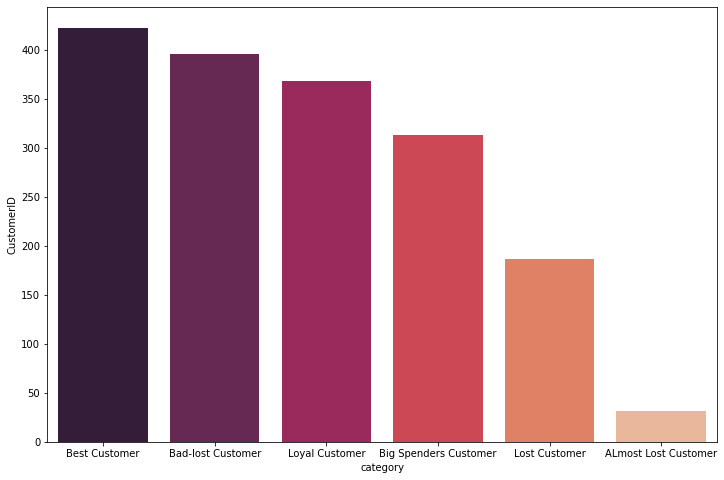

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(data=cust_df.drop([0]),x="category",y="CustomerID",palette="rocket")
plt.savefig("Customer Category.png")